In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec
import math
import statsmodels.api as sm
import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from scipy import stats, ndimage, misc
import csv
import opto_util as opto
from matplotlib.ticker import FormatStrFormatter
from ast import literal_eval
mpl.style.use('classic')
%matplotlib inline
import importlib

In [2]:
plt.rcParams.update({
    'font.sans-serif': 'arial',
    'font.family': 'sans-serif'
})

In [3]:
full_df=pd.read_csv('20210415_full_df.csv')

/Users/travish/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,24,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
intKclusters=pd.read_csv('interneuron_Kclusters_1203.csv')
full_df = pd.merge(full_df, intKclusters,  how='left', left_on=['exp_id','headstage'], right_on = ['experiment','headstage'])
full_df.Kcluster.unique()

array([ 1., nan,  0.,  2.])

In [5]:
standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]
print (np.shape(standard_df))

(16286, 85)


In [6]:
RorbAi167=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='Ai167')]
RorbKv=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
SstAi167=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='Ai167')]
SstKv=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PvalbKv=standard_df[(standard_df.presynapticCre=='Pvalb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PenkKv=standard_df[(standard_df.presynapticCre=='Penk') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Tlx3Kv=standard_df[(standard_df.presynapticCre=='Tlx3') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Scnn1aAi167=standard_df[(standard_df.presynapticCre=='Scnn1a') & (standard_df.presynapticEffector=='Ai167')]
Sst=standard_df[standard_df.presynapticCre=='Sst']
Ntsr1=standard_df[standard_df.presynapticCre=='Ntsr1']
Rorb=standard_df[standard_df.presynapticCre=='Rorb']
Scnn1a=standard_df[standard_df.presynapticCre=='Scnn1a']

In [22]:
Rorb_L23pyr=Rorb[(Rorb.post_class=='pyramidal') & (Rorb.post_layer==2)]
Rorb_L23FSI=Rorb[(Rorb.Kcluster==1) & (Rorb.post_layer==2)]
Penk_L23pyr=PenkKv[(PenkKv.post_class=='pyramidal') & (PenkKv.post_layer==2)]
Penk_L23FSI=PenkKv[(PenkKv.Kcluster==1) & (PenkKv.post_layer==2)]
Penk_L23VIP=PenkKv[(PenkKv.Kcluster==2) & (PenkKv.post_layer==2)]
Tlx3_L23pyr=Tlx3Kv[(Tlx3Kv.post_class=='pyramidal') & (Tlx3Kv.post_layer==2)]
Tlx3_L23FSI=Tlx3Kv[(Tlx3Kv.Kcluster==1) & (Tlx3Kv.post_layer==2)]
Sst_L23pyr=Sst[(Sst.post_class=='pyramidal') & (Sst.post_layer==2)]
Sst_L23FSI=Sst[(Sst.Kcluster==1) & (Sst.post_layer==2)]
Pvalb_L23pyr=PvalbKv[(PvalbKv.post_class=='pyramidal') & (PvalbKv.post_layer==2)]
Pvalb_Pvalb=PvalbKv[(PvalbKv.Kcluster==1) & (PvalbKv.post_layer==2)]
Pvalb_L23Pvalb=Pvalb_Pvalb[Pvalb_Pvalb.post_layer==2]

In [12]:
df_list=[Penk_L23pyr, Penk_L23FSI, Penk_L23VIP]
x_bins=np.arange(0,701,100)
y_bins=np.arange(50,1051,100)

for df in df_list:
    prob_matrix=opto.cnx_prob_2d(df, ['excitatory'], x_bins, y_bins, 0)
    df=opto.assign_est_cnx_prob_2d(df, x_bins, y_bins, prob_matrix)
    
Penk_L23combo=pd.concat(df_list)




In [18]:
df_list=[Rorb_L23pyr, Rorb_L23FSI]

for df in df_list:
    prob_matrix=opto.cnx_prob_2d(df, ['excitatory'], x_bins, y_bins, 0)
    df=opto.assign_est_cnx_prob_2d(df, x_bins, y_bins, prob_matrix)
Rorb_L23combo=pd.concat(df_list)


In [19]:
df_list=[Tlx3_L23pyr, Tlx3_L23FSI]

for df in df_list:
    prob_matrix=opto.cnx_prob_2d(df, ['excitatory'], x_bins, y_bins, 0)
    df=opto.assign_est_cnx_prob_2d(df, x_bins, y_bins, prob_matrix)
Tlx3_L23combo=pd.concat(df_list)


In [20]:
df_list=[Sst_L23pyr, Sst_L23FSI]

for df in df_list:
    prob_matrix=opto.cnx_prob_2d(df, ['inhibitory'], x_bins, y_bins, 0)
    df=opto.assign_est_cnx_prob_2d(df, x_bins, y_bins, prob_matrix)
Sst_L23combo=pd.concat(df_list)

In [25]:
df_list=[Pvalb_L23pyr, Pvalb_L23Pvalb]

for df in df_list:
    prob_matrix=opto.cnx_prob_2d(df, ['inhibitory'], x_bins, y_bins, 0)
    df=opto.assign_est_cnx_prob_2d(df, x_bins, y_bins, prob_matrix)
    
Pvalb_L23combo=pd.concat(df_list)


In [26]:
importlib.reload(opto)

<module 'opto_util' from '/Users/travish/Desktop/2p_opto_nbs/opto_util.py'>

In [29]:
Penk_ordered_div=opto.make_ordered_div_df(Penk_L23combo)
Rorb_ordered_div=opto.make_ordered_div_df(Rorb_L23combo)
Tlx3_ordered_div=opto.make_ordered_div_df(Tlx3_L23combo)
Pvalb_ordered_div=opto.make_ordered_div_df(Pvalb_L23combo)
Sst_ordered_div=opto.make_ordered_div_df(Sst_L23combo)

/Users/travish/Desktop/2p_opto_nbs/opto_util.py:135: RuntimeWarning: invalid value encountered in true_divide
  hist, x=np.histogram(values, bins=bins)
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:135: RuntimeWarning: invalid value encountered in true_divide
  hist, x=np.histogram(values, bins=bins)
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


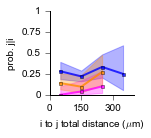

In [31]:
fs=10
tick_size=5
font='arial'
df_list=[Rorb_ordered_div,Penk_ordered_div,Tlx3_ordered_div]
colors=['blue','magenta','darkorange']
i=0
fig,ax=plt.subplots()
bins=np.arange(0,401,100)
tags=['Rorb','Penk','Tlx3']
for df in df_list:
    color=colors[i]
    tag=tags[i]
    df=df[df.post_class_j=='pyramidal']
    i_cnx=df[df.cnx_i=='excitatory']
    ij_dist=opto.frac_ci_j_give_i(i_cnx,'postpost_dxyz',['excitatory'],bins)
    opto.rate_ci_probed_cnx_x(ax, color, opto.midPoints(bins), ij_dist['probed'], ij_dist['conv'], min_probed=1,alpha=0.3, ls='solid')
    i+=1
    
ax.axis([0,400,0,1])
ax.set_xlabel(r'i to j total distance ($\mu$m)', fontsize=fs, fontname=font)
ax.set_ylabel('prob. j|i', fontsize=fs, fontname=font)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('exc_total_intersom_diverge.svg')


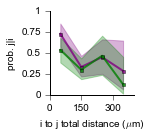

In [39]:
fs=10
tick_size=5
font='arial'
df_list=[Pvalb_ordered_div,Sst_ordered_div]
colors=['purple','green']
i=0
fig,ax=plt.subplots()
bins=np.arange(0,401,100)

tags=['Pvalb','Sst']

for df in df_list:
    color=colors[i]
    tag=tags[i]
    df=df[df.post_class_j=='pyramidal']
    i_cnx=df[df.cnx_i=='inhibitory']
    div=i_cnx[i_cnx.cnx_j=='inhibitory']
    ij_dist=opto.frac_ci_j_give_i(i_cnx,'postpost_dxyz',['inhibitory'],bins)
    opto.rate_ci_probed_cnx_x(ax, color, opto.midPoints(bins), ij_dist['probed'], ij_dist['conv'], min_probed=1,alpha=0.3, ls='solid')
    i+=1
    
ax.axis([0,400,0,1])
ax.set_xlabel(r'i to j total distance ($\mu$m)', fontsize=fs, fontname=font)
ax.set_ylabel('prob. j|i')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('inh_total_intersom_diverge.svg')


In [33]:
##measure cell to cell connectivity as a function of presynaptic layer to plot alongside divergence measurements
bins=[80,330,480,780,1000]
exc_L23_pyr=standard_df[(standard_df.post_class=='pyramidal') & (standard_df.post_layer==2)]
exc_L23_pyr=exc_L23_pyr[exc_L23_pyr.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]
exc_L23pyr_con=opto.connectivity_profile(exc_L23_pyr[exc_L23_pyr.abs_x<=300],'y_pia',bins)
Sst_L23pyr=Sst[(Sst.post_class=='pyramidal') & (Sst.post_layer==2)]
Pvalb_L23pyr=PvalbKv[(PvalbKv.post_class=='pyramidal') & (PvalbKv.post_layer==2)]
Sst_L23pyr_con=opto.connectivity_profile(Sst_L23pyr[Sst_L23pyr.abs_x<=150],'y_pia', bins)
Pvalb_L23pyr_con=opto.connectivity_profile(Pvalb_L23pyr[Pvalb_L23pyr.abs_x<=150],'y_pia', bins)

/Users/travish/Desktop/2p_opto_nbs/opto_util.py:135: RuntimeWarning: invalid value encountered in true_divide
  hist, x=np.histogram(values, bins=bins)
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


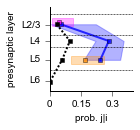

In [34]:

fs=10
tick_size=5
font='arial'
df_list=[Rorb_ordered_div,Penk_ordered_div,Tlx3_ordered_div]
colors=['blue','magenta','darkorange']
i=0
fig,ax=plt.subplots()
bins_list=[[80,330,480,780,1000],[20,330],[480,780]]

tags=['Rorb','Penk','Tlx3']
for df in df_list:
    color=colors[i]
    tag=tags[i]
    df=df[df.post_class_j=='pyramidal']
    i_cnx=df[df.cnx_i=='excitatory']
    bins=bins_list[i]
    ij_dist=opto.frac_ci_j_give_i(i_cnx,'pre_pia',['excitatory'],bins)
    opto.rate_ci_probed_cnx_y(ax, color, opto.midPoints(bins), ij_dist['probed'], ij_dist['conv'],alpha=0.3, ls='solid')
    i+=1

opto.layer_borders(ax,lw=1,alpha=0.6, ls=(0,(2,1)))   
ax.plot(exc_L23pyr_con['exc_frac'],exc_L23pyr_con['midX'],ls=(0, (2,2)),c='black',lw=2,marker='s',markersize=4)
ax.axis([0,0.4,1000,0])
ax.set_ylabel(r'presynaptic layer', fontsize=fs, fontname=font)
ax.set_xlabel('prob. j|i', fontsize=fs, fontname=font)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks([215,405,630,880])
ax.yaxis.set_ticklabels(['L2/3','L4','L5','L6'])
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('exc_prepia_diverge_compar.svg')


/Users/travish/Desktop/2p_opto_nbs/opto_util.py:135: RuntimeWarning: invalid value encountered in true_divide
  hist, x=np.histogram(values, bins=bins)
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


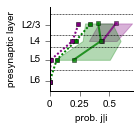

In [37]:

fs=10
tick_size=5
font='arial'
df_list=[Pvalb_ordered_div,Sst_ordered_div]
colors=['purple','green']
i=0
fig,ax=plt.subplots()
bin_list=[[60,330,480],[60,330,480,780,1000]]
bins=[60,330,480,780,1000]

tags=['Pvalb','Sst']
for df in df_list:
    color=colors[i]
    tag=tags[i]
    bins=bin_list[i]
    df=df[df.post_class_j=='pyramidal']
    i_cnx=df[df.cnx_i=='inhibitory']
    div=i_cnx[i_cnx.cnx_j=='inhibitory']
    ij_dist=opto.frac_ci_j_give_i(i_cnx,'pre_pia',['inhibitory'],bins)
    opto.rate_ci_probed_cnx_y(ax, color, opto.midPoints(bins), ij_dist['probed'], ij_dist['conv'],alpha=0.3, ls='solid',min_probed=1)
    i+=1
opto.layer_borders(ax,lw=1,alpha=0.6, ls=(0,(2,1)))   
ax.plot(Sst_L23pyr_con['inh_frac'],Sst_L23pyr_con['midX'],ls=(0, (2,2)),c='green',lw=2,marker='s',markersize=4)
ax.plot(Pvalb_L23pyr_con['inh_frac'],Pvalb_L23pyr_con['midX'],ls=(0, (2,2)),c='purple',lw=2,marker='s',markersize=4)
ax.axis([0,0.7,1000,0])
ax.set_ylabel(r'presynaptic layer', fontsize=fs, fontname=font)
ax.set_xlabel('prob. j|i', fontsize=fs, fontname=font)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks([215,405,630,880])
ax.yaxis.set_ticklabels(['L2/3','L4','L5','L6'])
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')

ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('inh_prepia_diverge_compare.svg')


Pvalb
42
(0.16155200836351513, 0.3067269563630256)
SpearmanrResult(correlation=0.11639224592424365, pvalue=0.46292166399250123)
Sst
42
(0.4688882199009623, 0.0017353803339543777)
SpearmanrResult(correlation=0.4018479494245421, pvalue=0.008341972705853537)


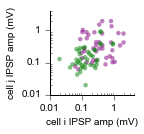

In [40]:
fs=10
tick_size=5
font='arial'
df_list=[Pvalb_ordered_div,Sst_ordered_div]
colors=['purple','green']
i=0
fig,ax=plt.subplots()
bins=np.arange(0,401,100)
x_lim=200
inh_amps_i=[]
inh_amps_j=[]
tags=['Pvalb','Sst']

for df in df_list:
    color=colors[i]
    tag=tags[i]
    df=df[df.post_class_j=='pyramidal']
    df=df[df.post_class_i=='pyramidal']
    df['abs_x_i']=abs(df['x_ap_i'])
    df['abs_x_j']=abs(df['x_ap_j'])
    i_cnx=df[df.cnx_i=='inhibitory']
    div=i_cnx[i_cnx.cnx_j=='inhibitory']
    div=div.dropna(subset=['amp_i', 'amp_j'])
    amp_i=np.array(div.amp_i)*-1
    amp_j=np.array(div.amp_j)*-1
    plt.scatter(amp_i, amp_j, facecolor=color,alpha=0.5,edgecolor='none')
    print (tag)
    print (np.shape(div)[0])
    print (stats.pearsonr(np.log(amp_i), np.log(amp_j)))
    print (stats.spearmanr(np.log(amp_i),np.log(amp_j)))
    inh_amps_i=np.append(inh_amps_i, np.array(div.amp_i))
    inh_amps_j=np.append(inh_amps_j, np.array(div.amp_j))
    i+=1
    
ax.axis([0.01,4,0.01,4])
ax.set_xlabel('cell i IPSP amp (mV)', fontsize=fs, fontname=font)
ax.set_ylabel('cell j IPSP amp (mV)', fontsize=fs, fontname=font)
plt.xscale('log')
plt.yscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('diverge_ampij_inh.svg')


Rorb
64
(-0.2478448167590631, 0.04831283791724324)
SpearmanrResult(correlation=-0.2477270124813924, pvalue=0.04842298984683129)
Tlx3
14
(-0.4580022971201845, 0.09958051603315937)
SpearmanrResult(correlation=-0.6106194690265486, pvalue=0.02037218733143396)


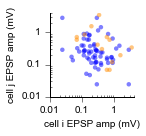

In [41]:
fs=10
tick_size=5
font='arial'
df_list=[Rorb_ordered_div,Tlx3_ordered_div]
colors=['blue','darkorange']
i=0
fig,ax=plt.subplots()
bins=np.arange(0,401,100)


tags=['Rorb','Tlx3']
for df in df_list:
    color=colors[i]
    tag=tags[i]
    df=df[df.post_class_j=='pyramidal']
    df=df[df.post_class_i=='pyramidal']
    df=df.dropna(subset=['amp_i', 'amp_j'])
    i_cnx=df[df.cnx_i=='excitatory']
    div=i_cnx[i_cnx.cnx_j=='excitatory']
    print (tag)
    print (np.shape(div)[0])
    print (stats.pearsonr(np.log(div.amp_i),np.log(div.amp_j)))
    print (stats.spearmanr(np.log(div.amp_i),np.log(div.amp_j)))
    plt.scatter(div.amp_i, div.amp_j, facecolor=color,alpha=0.5,edgecolor='none')

    i+=1
    
ax.axis([0.01,4,0.01,4])
ax.set_xlabel('cell i EPSP amp (mV)', fontsize=fs, fontname=font)
ax.set_ylabel('cell j EPSP amp (mV)', fontsize=fs, fontname=font)
plt.xscale('log')
plt.yscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('diverge_ampij_exc.svg')
